# 0. Install Dependencies

In [9]:
!pip3 install stable-baselines3 gym-anytrading

In [5]:
!pip3 install tensorflow

In [10]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 1. Bring in Market Data

In [50]:
df = pd.read_csv('data/ethdata.csv', thousands=',')

In [51]:
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [52]:
df['Date'] = pd.to_datetime(df['Date'])

In [53]:
df.head()

,Date,Open,High,Low,Close
0,2021-06-17,2400.17,2457.61,2306.55,2343.23
1,2021-06-16,2523.24,2563.96,2382.43,2402.42
2,2021-06-15,2541.43,2639.23,2512.66,2522.43
3,2021-06-14,2577.09,2608.27,2520.78,2541.84
4,2021-06-13,2403.58,2562.82,2316.34,2562.82


In [54]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close
Date,,,,
2021-06-17,2400.17,2457.61,2306.55,2343.23
2021-06-16,2523.24,2563.96,2382.43,2402.42
2021-06-15,2541.43,2639.23,2512.66,2522.43
2021-06-14,2577.09,2608.27,2520.78,2541.84
2021-06-13,2403.58,2562.82,2316.34,2562.82


In [62]:
df.tail()

,Open,High,Low,Close
Date,,,,
2017-01-05,11.02,11.64,9.10,10.32
2017-01-04,9.63,11.12,9.42,11.02
2017-01-03,8.37,10.10,8.26,9.57
2017-01-02,8.20,8.48,8.10,8.40
2017-01-01,8.10,8.56,8.05,8.20


In [67]:
print(len(df))

1264


In [102]:
df = df[::-1]

In [103]:
df.head()

,Open,High,Low,Close
Date,,,,
2017-01-01,8.10,8.56,8.05,8.20
2017-01-02,8.20,8.48,8.10,8.40
2017-01-03,8.37,10.10,8.26,9.57
2017-01-04,9.63,11.12,9.42,11.02
2017-01-05,11.02,11.64,9.10,10.32


In [104]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,1263), window_size=5)

In [105]:
env.prices

array([   8.2 ,    8.4 ,    9.57, ..., 2541.84, 2522.43, 2402.42])

# 2. Build Environment

info {'total_reward': 1069.1000000000004, 'total_profit': 0.07736027268235024, 'position': 1}


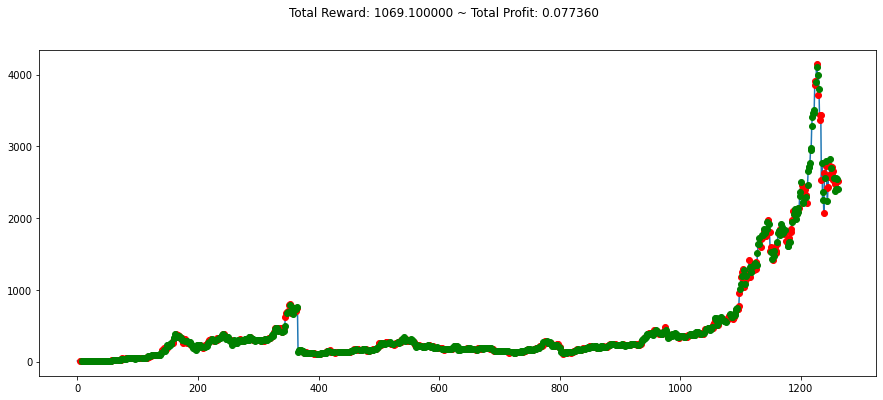

In [106]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# 3. Train the Model

In [116]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,1263), window_size=5)
env = DummyVecEnv([env_maker])

In [ ]:
model = A2C('MlpPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

In [135]:
env = gym.make('stocks-v0', df=df, frame_bound=(1163,1263), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 1454.1200000000003, 'total_profit': 1.456882978089848, 'position': 1}


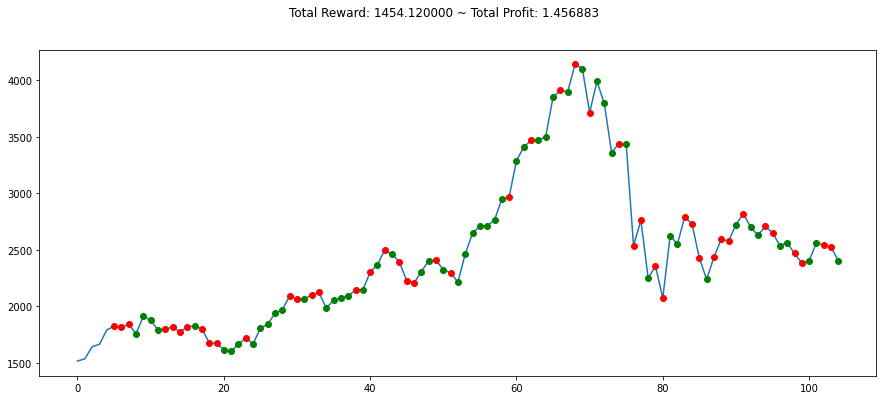

In [136]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()